<a href="https://colab.research.google.com/github/Manju-5/Assignment/blob/main/DSA_Assignment_4_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1

In [2]:
data= pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.Passenger Id as index column

In [3]:
data= pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 11)

3 checking details

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4 Filling missing values

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan)

In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

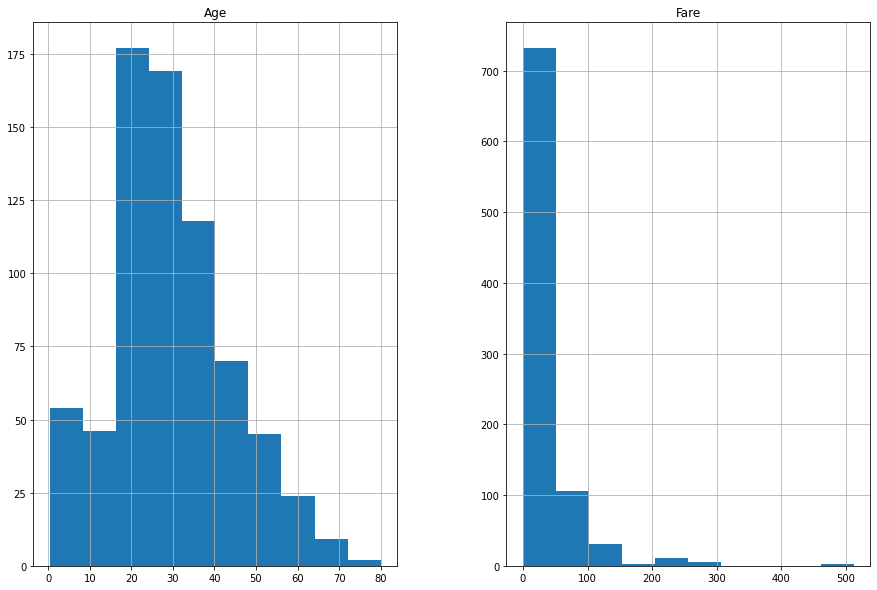

In [9]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show

In [10]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for col in['Age','Fare']:
  data[col]=data[col].fillna(data[col].median())

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

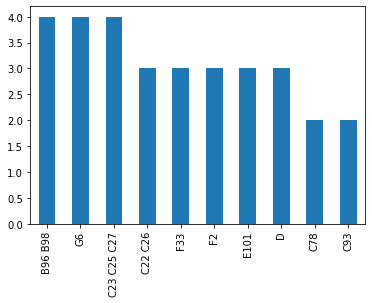

In [13]:
data['Cabin'].value_counts().head(10).plot.bar()

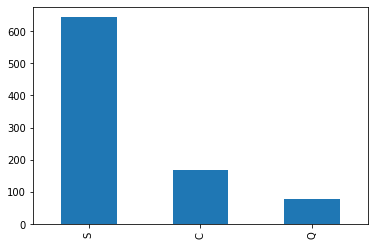

In [14]:
data['Embarked'].value_counts().plot.bar()

In [15]:
def impute_nan_most_frequent_category(data,ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=data[ColName].mode()[0]
    # replace nan values with most occured category
    data[ColName + "_Imputed"] = data[ColName]
    data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [16]:
for Columns in ['Embarked','Cabin']:
    impute_nan_most_frequent_category(data,Columns)

In [17]:
data.isna().sum()

Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Embarked_Imputed      0
Cabin_Imputed         0
dtype: int64

In [18]:
data = data.drop(['Embarked','Cabin'], axis = 1)

In [19]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Imputed,Cabin_Imputed
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,B96 B98
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C85
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,B96 B98
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C123
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,B96 B98
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,B96 B98
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B42
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,B96 B98


In [20]:
data.isna().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked_Imputed    0
Cabin_Imputed       0
dtype: int64

5 Handling Outliers

Text(0.5, 1.0, 'Age')

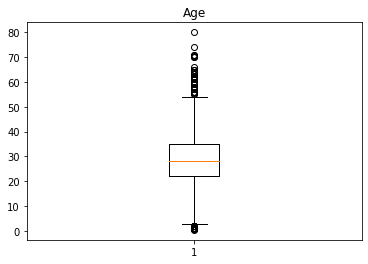

In [21]:
plt.boxplot(data['Age'])
plt.title('Age')

In [22]:
Q1=np.percentile(data['Age'],25, interpolation='midpoint')
Q2=np.percentile(data['Age'],50, interpolation='midpoint')
Q3=np.percentile(data['Age'],75, interpolation='midpoint')
print (Q1)
print (Q2)
print (Q3)

22.0
28.0
35.0


In [23]:
data['Age'].median()

28.0

In [24]:
IQR= Q3-Q1
IQR

13.0

In [25]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print (low_lim)
print (up_lim)

2.5
54.5


In [26]:
outliers=[]
for i in data ['Age']:
  if (i> up_lim) or (i< low_lim):
    outliers.append(i)
outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [27]:
ind=data['Age']>up_lim
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

Text(0.5, 1.0, 'Fare')

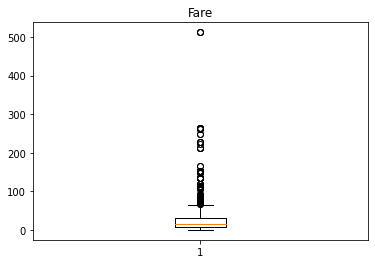

In [28]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [29]:
Q1=np.percentile(data['Fare'],25, interpolation='midpoint')
Q2=np.percentile(data['Fare'],50, interpolation='midpoint')
Q3=np.percentile(data['Fare'],75, interpolation='midpoint')
print (Q1)
print (Q2)
print (Q3)

7.9104
14.4542
31.0


In [30]:
data['Fare'].median()

14.4542

In [31]:
IQR= Q3-Q1
IQR

23.0896

In [32]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print (low_lim)
print (up_lim)

-26.724
65.6344


In [33]:
outliers=[]
for i in data ['Fare']:
  if (i> up_lim) or (i< low_lim):
    outliers.append(i)
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [34]:
ind=data['Fare']>up_lim
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

Text(0.5, 1.0, 'SibSp')

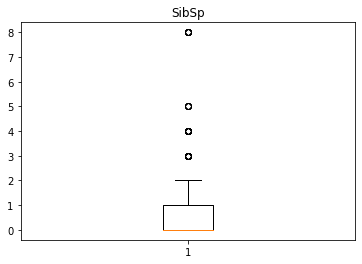

In [35]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')

In [36]:
Q1=np.percentile(data['SibSp'],25, interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50, interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75, interpolation='midpoint')
print (Q1)
print (Q2)
print (Q3)

0.0
0.0
1.0


In [37]:
data['SibSp'].median()

0.0

In [38]:
IQR= Q3-Q1
IQR

1.0

In [39]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print (low_lim)
print (up_lim)

-1.5
2.5


In [40]:
outliers=[]
for i in data ['SibSp']:
  if (i> up_lim) or (i< low_lim):
    outliers.append(i)
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

6 Min Max Scaling

In [41]:
ind=data['SibSp']>up_lim
data.loc[ind].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [42]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked_Imputed', 'Cabin_Imputed'],
      dtype='object')

In [46]:
from sklearn import preprocessing

In [47]:
label_encoder=preprocessing.LabelEncoder()

In [48]:
data['Name']=label_encoder.fit_transform(data['Name'])
data['Ticket']=label_encoder.fit_transform(data['Ticket'])
data['Sex']=label_encoder.fit_transform(data['Sex'])
data['Cabin_Imputed']=label_encoder.fit_transform(data['Cabin_Imputed'])
data['Embarked_Imputed']=label_encoder.fit_transform(data['Embarked_Imputed'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Imputed,Cabin_Imputed
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.0,1,0,523,7.2500,2,47
2,1,1,190,0,38.0,1,0,596,71.2833,0,81
3,1,3,353,0,26.0,0,0,669,7.9250,2,47
4,1,1,272,0,35.0,1,0,49,53.1000,2,55
5,0,3,15,1,35.0,0,0,472,8.0500,2,47


In [56]:
X=data.drop('Survived',axis=1) # because Survived is target

In [57]:
x1=X.drop(['Name','Sex','Ticket','Cabin_Imputed','Embarked_Imputed'],axis=1)

In [58]:
x1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [59]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [60]:
x1=min_max_scaler.fit_transform(x1)
type(x1)

numpy.ndarray

In [61]:
x1=pd.DataFrame(x1,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [62]:
x1.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.472229,0.125,0.0,0.139136
2,1.0,0.321438,0.000,0.0,0.015469
3,0.0,0.434531,0.125,0.0,0.103644
4,1.0,0.434531,0.000,0.0,0.015713


In [63]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X.drop(['Pclass','Age','SibSp','Parch','Fare'],axis=1,inplace=True)
X.head()

,Name,Sex,Ticket,Embarked_Imputed,Cabin_Imputed
PassengerId,,,,,
1,108,1,523,2,47
2,190,0,596,0,81
3,353,0,669,2,47
4,272,0,49,2,55
5,15,1,472,2,47


In [66]:
X=pd.concat([X,x1],axis=1)
X.head()

,Name,Sex,Ticket,Embarked_Imputed,Cabin_Imputed,Pclass,Age,SibSp,Parch,Fare,Pclass,Age,SibSp,Parch,Fare
0,NaN,NaN,NaN,NaN,NaN,1.0,0.271174,0.125,0.0,0.014151,1.0,0.271174,0.125,0.0,0.014151
1,108.0,1.0,523.0,2.0,47.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.472229,0.125,0.0,0.139136
2,190.0,0.0,596.0,0.0,81.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.321438,0.000,0.0,0.015469
3,353.0,0.0,669.0,2.0,47.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.434531,0.125,0.0,0.103644
4,272.0,0.0,49.0,2.0,55.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.434531,0.000,0.0,0.015713
